# Generation of Random Walks and Brownian Motions in Python

- Random Walk
- Gaußian Random Walk
- Brownian Motion
- Geometric Brownian Motion

---
Sergej Schweizer

In [1]:
#!pip3 install  -r requirements.txt

In [2]:
#!pip freeze |grep @ -v > requirements.txt

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt

plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
SIZE = (1000,30)

# Random Walk
---

In [5]:
# function for generation random walk
def generate_random_walk(size: tuple = (1000, 1)) -> np.array:
    return np.cumsum(
        np.random.choice(
            [1, -1], size=size
        ),axis=0,
    )

np_random_walk = generate_random_walk(size=SIZE)

<Axes: >

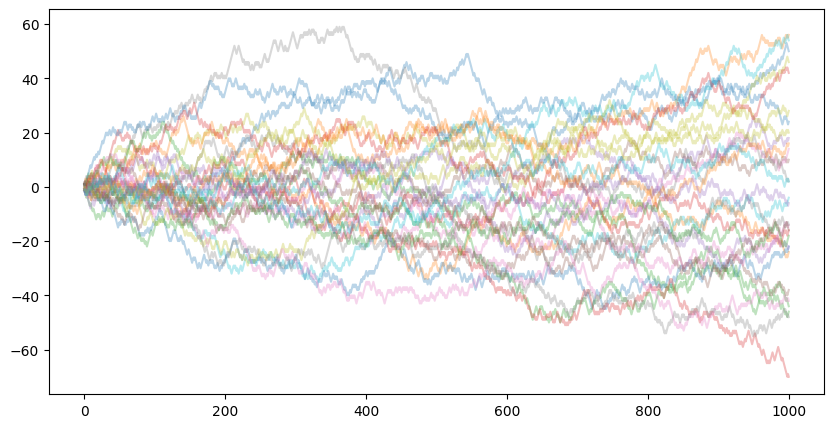

In [6]:
pd.DataFrame(np_random_walk).plot(legend=False, alpha=.3)

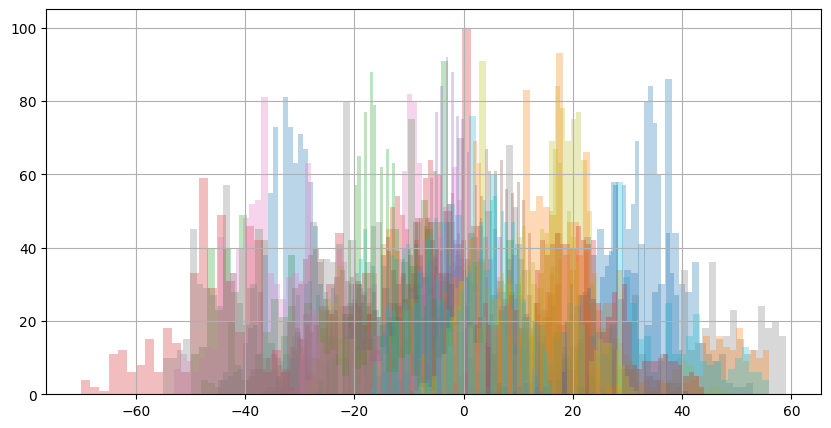

In [7]:
for col in pd.DataFrame(np_random_walk).columns.to_list():
    pd.DataFrame(np_random_walk)[col].hist(bins=50, alpha=.3)

# Gaussian Random Walk
---

In [8]:
# function to generate gaussian random walk
def generate_gaussian_random_walk(size: tuple = (1000, 1)) -> np.array:
    return np.cumsum(
        np.random.normal(size=size),
    axis=0)

np_gaussian_random_walk = generate_gaussian_random_walk(size=SIZE)

<Axes: >

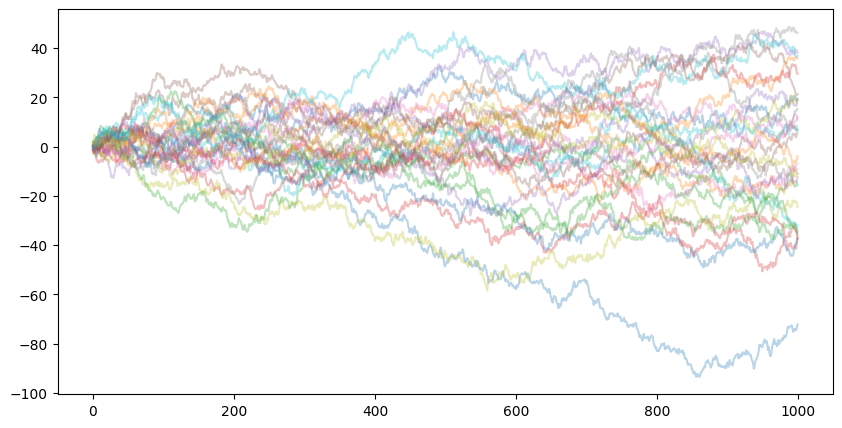

In [9]:
pd.DataFrame(np_gaussian_random_walk).plot(legend=False, alpha=.3)

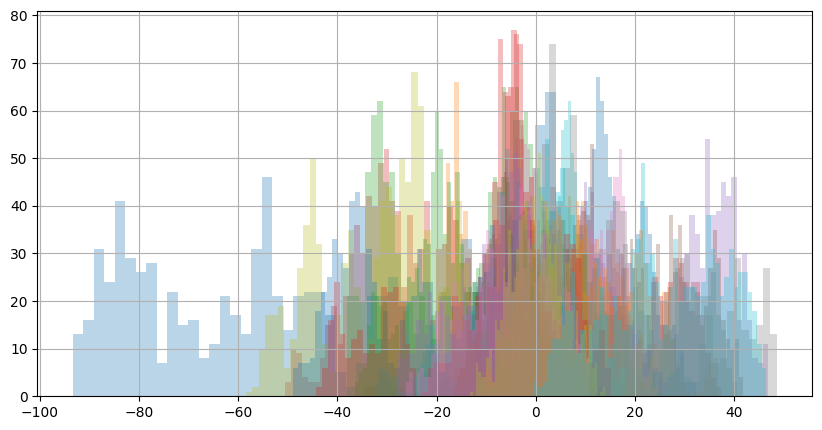

In [10]:
for col in pd.DataFrame(np_gaussian_random_walk).columns.to_list():
    pd.DataFrame(np_gaussian_random_walk)[col].hist(bins=50, alpha=.3)

# Brownian Motion (Wiener Process)
---

In [11]:
# function to generate gaussian random walk
def generate_brownian_motion(size: tuple = (1000, 1)) -> np.array:
    dt = 1/size[0]
    return np.cumsum(
        np.sqrt(dt) * np.random.randn(size[0],size[1]),
    axis=0)

np_brownian_motion = generate_brownian_motion(size=SIZE)

<Axes: >

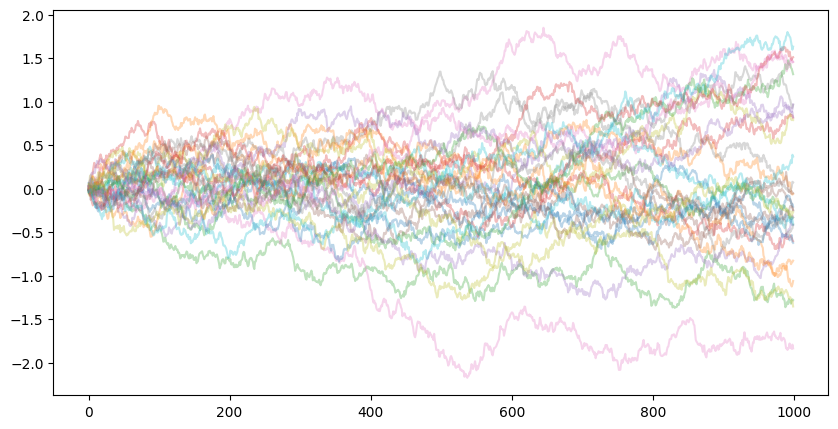

In [12]:
pd.DataFrame(np_brownian_motion).plot(legend=False, alpha=.3)

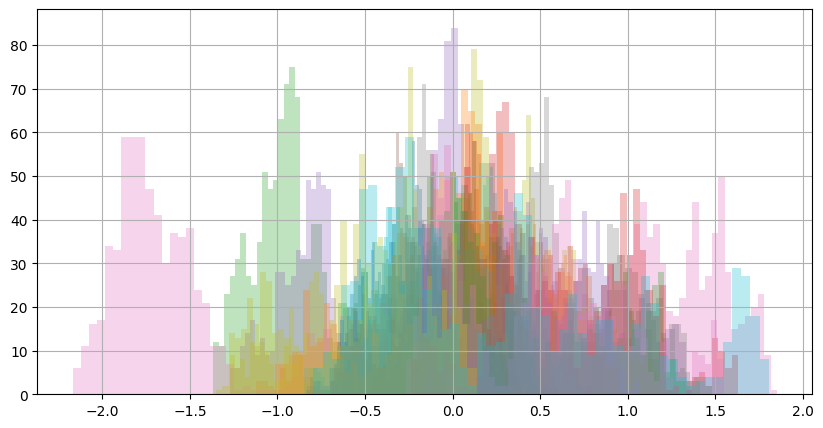

In [13]:
for col in pd.DataFrame(np_brownian_motion).columns.to_list():
    pd.DataFrame(np_brownian_motion)[col].hist(bins=50, alpha=.3)

# Geometric Brownian Motion
---

In [14]:
# function to generate gaussian random walk
def generate_geometric_brownian_motion(
        size: tuple = (1000, 1),
        mu:float = 0.1, # drift,
        sigma:float = 0.3, # volatility
        s0:float = 0.1, #initial value
) -> np.array:
    dt = 1/size[0]

    st = np.exp(
        (mu - sigma**2/2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size)
    )

    return s0 * st.cumprod(axis=0)

np_geometric_brownian_motion = generate_geometric_brownian_motion(size=SIZE)

<Axes: >

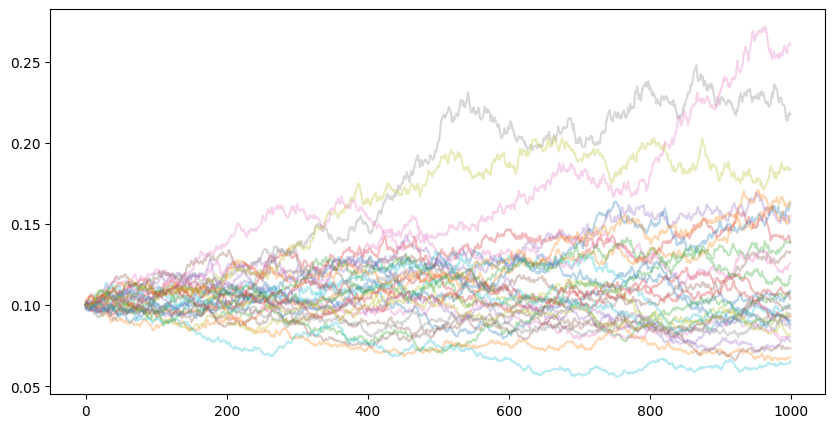

In [15]:
pd.DataFrame(np_geometric_brownian_motion).plot(legend=False, alpha=.3)

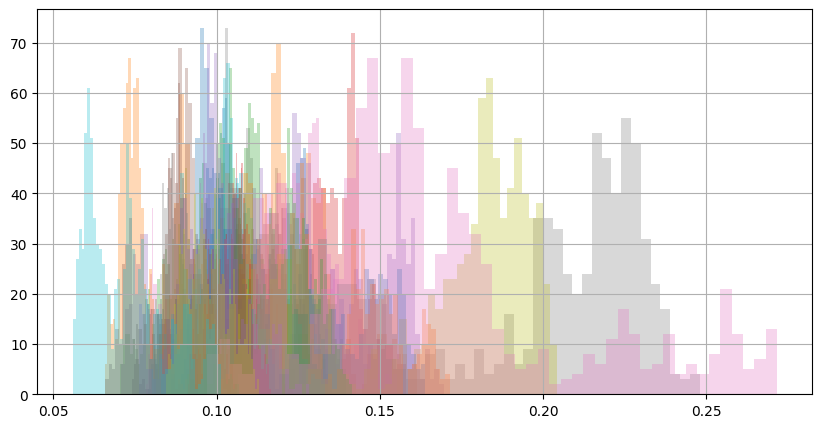

In [16]:
for col in pd.DataFrame(np_geometric_brownian_motion).columns.to_list():
    pd.DataFrame(np_geometric_brownian_motion)[col].hist(bins=50, alpha=.3)